# IoT & Smart Analytics
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, participants will be able to
* understand the concept of Multi Layer Perceptron (MLP)
* understand the backpropagation algorithm
* know different activation functions 
* build an image classifier using the Keras Sequential API

### The Multilayer Perceptron and Backpropagation

An MLP is composed of 

* one (passthrough) **input layer**, 
* one or more layers of LTUs called **hidden layers**, and 
* one final layer of LTUs called the **output layer** as shown in the figure below. 

The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers.

**Equations used in forward propagation** :
<center>

~--------------------------------------~

$Z^{[1]}=W^{[1]}X + b^{[1]}$

$A^{[1]}=\sigma (Z^{[1]})$

~--------------------------------------~

$Z^{[2]}=W^{[2]}A^{[1]} + b^{[2]}$

$A^{[2]}=\sigma (Z^{[2]})$

~--------------------------------------~

$Z^{[3]}=W^{[3]}A^{[2]} + b^{[3]}$

$A^{[3]}=\sigma (Z^{[3]})$

~--------------------------------------~

Where,  $ \sigma \rightarrow  Activation Function $



<img src="https://cdn.extras.talentsprint.com/IOT/Images/mlp_network.png" width= 500px/>
</center>



When an ANN contains a deep stack of hidden layers, it is called a **deep neural network (DNN)**. The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations.

MLPs are trained using **backpropagation training algorithm**.

In short, it is Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter. 

In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

Let’s run through this algorithm in detail:

* It handles one mini-batch at a time (say, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an **epoch**.

* Each mini-batch is passed to the network’s **input layer**, which sends it to the first **hidden layer**. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the **output layer**. This is the **forward pass**: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

* Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

* Then it computes how much each output connection contributed to the error.
This is done analytically by applying the chain rule, which makes this step fast and precise.

* The algorithm then measures how much of these error contributions came from
each connection in the layer below, again using the chain rule, working backward
until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network.

* Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

Let's summarize this algorithm again: for each training instance, the backpropagation algorithm first makes a prediction (**forward pass**) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (**reverse pass**), and finally tweaks the connection weights to reduce the error (Gradient Descent step).

In order for this algorithm to work properly, the step function was replaced with an activation function.

### Activation Functions

Replacing the step function with the activation function was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the activation function has a well-defined nonzero derivative, allowing Gradient Descent to make some progress at every step.

Some of the activation functions are shown below:

* **Logistic (sigmoid) function:**

$$σ(z) = \frac{1}{1 + exp(–z)}$$

It is an S-shaped function, exists between $0$ to $1$. Therefore, it is especially used for models where we have to predict the probability as an output. The function is differentiable.
That means, we can find the slope of the sigmoid curve at any two points.

* **Hyperbolic tangent function:** 

$$tanh(z) = 2σ(2z) – 1 = \frac{2}{1 + exp(–2z)} - 1$$

Just like the logistic function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from $–1$ to $1$. That range tends to make each layer’s output more or less centered around $0$ at the beginning of training, which often helps speed up convergence.

* **Rectified Linear Unit function:**

$$ReLU(z) = max(0, z)$$

The ReLU function is continuous but unfortunately not differentiable at $z = 0$
(the slope changes abruptly, which can make Gradient Descent bounce around),
and its derivative is $0$ for $z < 0$. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default. Most importantly, the fact that it does not have a maximum output value helps reduce some issues during Gradient Descent.

These popular activation functions and their derivatives are represented in
the figure below. 
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1008.png" width=700px/>
</center>
<br><br>

**Why do we need activation functions?** 

If we chain several linear transformations, all we get is a linear transformation. For example, if $f(x) = 2x + 3$ and $g(x) = 5x – 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x – 1) + 3 = 10x + 1.$ 

So if we don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and we can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

Training a DNN is not an easy task. Let's see what difficulties we may encounter during that process.

### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

### Building an Image Classifier Using the Sequential API

Here we consider the Fashion MNIST dataset. It has the same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. 

In [ ]:
# Using Keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Shape and datatype of X_train_full
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
X_train_full

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0:

In [ ]:
# Validation set and scaling
X_valid = X_train_full[:5000] / 255.0 # 5000 dataset are spared for validation

X_train = X_train_full[5000:] / 255.0 #55000 dataseet are used for training

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape , X_test.shape

((5000, 28, 28), (10000, 28, 28))

Plotting an image using Matplotlib's imshow() function, with a 'binary' color map:

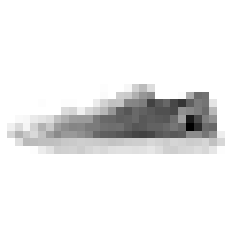

In [ ]:
plt.imshow(X_train[49000], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train[49000]

7

Here are the corresponding class names:

In [ ]:
# List of labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# First image in the training set
class_names[y_train[49000]]

'Sneaker'

**Creating the model using the Sequential API**

Here is a classification MLP with two hidden layers:

In [ ]:
# Create model with 2 hidden layers and one output layer
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

Let’s go through the above code line by line:

* The first line creates a Sequential model. This is the simplest kind of Keras
model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.

* Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, we should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, we could add a `keras.layers.InputLayer` as the first layer, setting input_shape=[28,28].

* Next, we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes $h_{W, b}(X) = \sigma( WX + b)$.

* Then we add a second Dense hidden layer with 100 neurons, also using the ReLU
activation function.

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

Instead of adding the layers one by one we can pass a list of layers when creating the Sequential model:


In [ ]:
# Create model with 2 hidden layers and one output layer
model = Sequential([
                    Flatten(input_shape=[28, 28]),
                    Dense(300, activation="relu"),
                    Dense(100, activation="relu"),
                    Dense(10, activation="softmax")
                    ])

The model’s summary() method displays all the model’s layers, including each layer’s name, its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters.

In [ ]:
# Summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Getting weights and biases 

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

In [ ]:
biases

**Compiling the model**
After a model is created, we must call its `compile()` method to specify the loss function and the optimizer to use.

In [ ]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

GD, SGD, ADAM ,RMS, RMSporp

In the above code cell, 

* first, we use the **"sparse_categorical_crossentropy"** loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead, we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

* Regarding the optimizer, **"sgd"** means that we will train the model using simple Stochastic Gradient Descent. 

* Finally, since this is a classifier, it’s useful to measure its **"accuracy"** during training and evaluation.

**Training and evaluating the model**

In [ ]:
# Training model on Training set
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

The `fit()` method returns a History object containing the training parameters
(`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

Let's plot the learning curves:

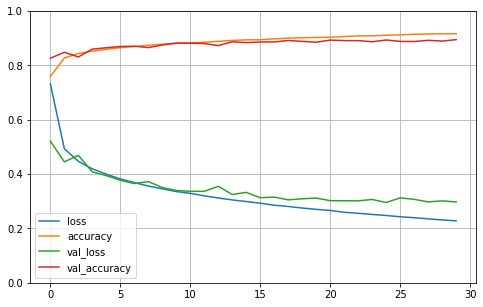

In [ ]:
# Visualize training and validation metrics
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
# set the vertical range to [0-1]
plt.gca().set_ylim(0, 1) 
plt.show()

We can see that both the training accuracy and the validation accuracy steadily
increase during training, while the training loss and the validation loss decrease. Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting.

Once we are satisfied with the model’s validation accuracy, we should evaluate it on the test set to estimate the generalization error before we deploy the model to production. We can easily do this using the `evaluate()` method:

In [ ]:
# Model performance on test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 57.3835 - accuracy: 0.8548


[57.38353729248047, 0.8547999858856201]

**Using the model to make predictions**

We can use the model’s `predict()` method to make predictions on new instances.

In [ ]:
# Predict class probabilities for first three instances of X_test
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Predict class labels for first three instances of X_test
y_pred = np.argmax(model.predict(X_new), axis=1)
print("Predicted labels: \n", y_pred)

print(np.array(class_names)[y_pred])

Predicted labels: 
 [9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


Actual labels:  [9 2 1]


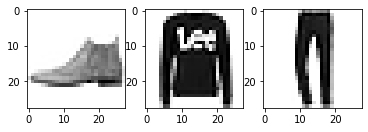

In [ ]:
# Actual labels
y_new = y_test[:3]
print("Actual labels: ", y_new)

fig, ax = plt.subplots(1,3)
for axi, i in zip(ax.ravel(), np.arange(len(X_new))):
    axi.imshow(X_new[i], cmap='Greys')

#### Getting weights and biases of each layer

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.01453317, -0.0664834 ,  0.01298573, ..., -0.01958185,
         0.01035887, -0.04188047],
       [ 0.01453721, -0.03060254,  0.02063166, ...,  0.05427672,
        -0.00328108, -0.03077198],
       [ 0.00181316, -0.03580233,  0.03157273, ..., -0.07089037,
        -0.02457847, -0.03573252],
       ...,
       [-0.06716126, -0.05222267, -0.06161373, ..., -0.00898446,
         0.06429867,  0.03547104],
       [-0.06261738,  0.04040914,  0.03574505, ...,  0.00926976,
         0.03823737, -0.04303818],
       [-0.04582891,  0.06553324,  0.06384683, ..., -0.06706809,
        -0.02878686, -0.01392592]], dtype=float32)

In [ ]:
biases

array([ 5.95638044e-02,  2.11138371e-03,  3.55569227e-03, -5.46730543e-03,
        9.32975858e-02,  1.54237956e-01,  1.29158422e-01, -4.11729235e-03,
       -1.12048984e-01, -1.18702482e-02,  8.43935683e-02, -1.34162093e-02,
        1.15127854e-01, -7.22457543e-02, -3.84623162e-03,  1.28166631e-01,
        3.39813009e-02,  5.00343964e-02, -2.76890714e-02, -8.41617398e-03,
        1.17802016e-01,  1.36785775e-01,  1.74466390e-02,  4.40336689e-02,
       -1.52477816e-01,  1.55393006e-02,  2.27227472e-02,  1.55199952e-02,
        1.13497404e-02, -1.86971389e-02, -2.42794845e-02, -2.58617074e-04,
        1.52591011e-02,  7.80644864e-02,  8.67439508e-02, -5.54097351e-03,
        1.03070572e-01, -2.10545827e-02,  6.57791346e-02, -2.83504650e-02,
        1.27219930e-01,  2.10082486e-01,  1.25805303e-01,  5.58400303e-02,
        8.87760986e-03,  8.51259567e-03,  3.24539356e-02,  2.35870350e-02,
        1.34946750e-02,  1.64472417e-03,  5.95640019e-03,  9.65701938e-02,
        1.26140386e-01,  